# Some Experiments

In [1]:
import sys; sys.path.insert(0,"../")


import mview

In what follows, we show how to run different tests for our standard experiment.

The set of dissimilarity relations used is the following:

1: A 3D position is assigned to each node. This position is assigned randomly, sampled from a uniform distribution over the disk of radius 1 centered at the origin in 3D space.

2: An orthogonal projection matrix is assigned to each attribute/perspective. The projection matrix is assigned randomly, sampled from the set of orthogonal projections.

3: For each attribute/perspective, a pairwise dissimilarities are obtained by measuring the distance of the nodes after being projected into 2D space by the corresponding orthogonal projection matrix.

We use the following parameters throughout:

In [2]:
# Dissimilarity parameters:
node_number = 32 #number of nodes
attributes = 3 #number of projections

# Computation parameters:
min_cost = 1e-2 #minimum cost stoppint criteria
max_iter = 200 #maximum number of iterations
min_grad = 1e-6 #early stopping criterion: end if gradient is small
average_neighbors = 2 #average number of neighbors per node
lr = 1.0 #initial learning rate

## Setting up the set of dissimilarities

We can set up the set of dissimilarities as follows:

In [3]:
dissimilarities = mview.DISS(node_number=node_number)
dissimilarities.add_projections(attributes=attributes)

The first line tells mview to set up an object in the DISS class, which will contain the dissimilarity relations, and has methods to add dissimilarities from different data types. It doesn't contain any dissimilarity relations initially. It requires the number of nodes that will be used as input (it is always assumed that all attributes/perspectives will refer to the same number of nodes).

The second line adds the indicated number of attributes/perspectives to the DISS object. This method will assign 3D coordinates to each node, an orthogonal projection matrix to each attribute/perspective indicated, and sets up the functions that will compute the necessary distances.

To access the 3D coordinates and list of projection matrices used to define the set of dissimilarities, you can do the following:

In [4]:
X = dissimilarities.X
Q = dissimilarities.Q

print('Coordinates used:')
print(X)
print('Projections used:')
for q in Q:
    print(q)

Coordinates used:
[[-0.18791105 -0.95089807  0.24183791]
 [-0.06787278 -0.26754693 -0.92919494]
 [-0.08452898 -0.17087372  0.31947623]
 [ 0.10411246 -0.77548067 -0.48810107]
 [-0.55150648  0.08950738 -0.07674009]
 [ 0.45286219  0.06000395 -0.29613508]
 [ 0.12260853  0.06660134  0.67049973]
 [ 0.42225015  0.54213086 -0.26375048]
 [-0.94611422 -0.12283098  0.13071008]
 [-0.61994897 -0.09819296 -0.07766997]
 [-0.01285311  0.30996294  0.32516458]
 [-0.8600305   0.293933    0.15912817]
 [-0.4320081  -0.34376545 -0.53844614]
 [ 0.42672003 -0.47177     0.69378758]
 [-0.518288    0.58335185 -0.62304411]
 [-0.08019725  0.71744156 -0.48168494]
 [-0.40935318  0.04199466 -0.09519994]
 [ 0.79962833  0.45834552 -0.131262  ]
 [-0.31073713 -0.80336077  0.16535767]
 [ 0.07161107  0.56738552 -0.3540824 ]
 [-0.05201197 -0.02505776  0.46928921]
 [ 0.45926022 -0.03216706 -0.24415721]
 [ 0.62481119  0.40771442  0.60378825]
 [ 0.51301266  0.26994043  0.48538336]
 [ 0.14433169  0.68509087  0.66870575]
 [ 0.25

We can then run the mview.basic (optimizing for both coordinates and projections) using the DISS object 'dissimilarities' as input (instead of a list of distance matrices or features or dictionary).

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 32
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 4.59e-01
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-02
    min_grad : 1.00e-06
    max_iter : 200
    max_step : 1.00e+10
  progress:
200 : step = 3.41e-03, grad = 1.45e-02, cost = 1.02e-02, lr = 5.34e-01
  results:
    conclusion : minimum cost reached
    total iterations : 93
    final cost : 7.96e-03
    time : 7.33e-01 [sec]
  Final stress : 5.98e-03

initial normalized cost:
0.4591647765194461

initial individual normalized costs:
[0.44199942 0.48768913 0.44642211]

final normalized cost:
0.005984850052616872

final individual normalized costs:
[0.0078175  0.0

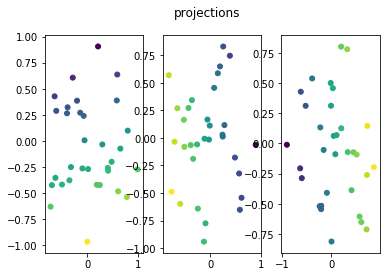

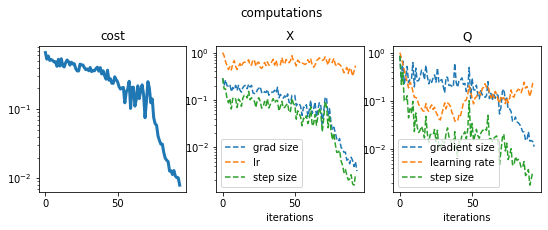

In [5]:
mv = mview.basic(dissimilarities, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)

print('\ninitial normalized cost:')
print(mv.initial_cost)
print('\ninitial individual normalized costs:')
print(mv.initial_individual_cost)
print('\nfinal normalized cost:')
print(mv.cost)
print('\nfinal individual normalized costs:')
print(mv.individual_cost)
print('\ncomputation time:')
print(mv.time)

mv.figureY()
mv.figureH()

To run the same experiment (using the same set of dissimilarities), but with fixed projections, you have to specify the set of projections to be used (we will use the 'ground-truth' set of projections, which we obtained directly from the set of dissimilarities.

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : given
  dissimilarity stats:
    number of views : 3
    number of points : 32
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : fixed projections
    initial stress : 4.15e-01
gd.single(): 
  computation parameters:
    stochastic : True
    constraint : False
    update rule : mm
    min_cost : 1.00e-02
    min_grad : 1.00e-06
    max_iter : 200
    max_step : 1.00e+10
  progress:
     199/200 : cost = 8.04e-02, grad = 3.20e-02, lr = 7.07e-01, step = 2.26e-02
  results:
    conclusion : maximum number of iterations reached
    total iterations : 199
    final cost : 8.04e-02
    final gradient size : 3.20e-02
    final learning rate : 7.07e-01
    final step size : 2.26e-02
    time : 1.44e+00 [sec]
  Final stress : 5.86e-02

initial normalized cost:
0.4151494251400922

initial individual normalized costs:
[0.40233161 0.4311838  0.41140849]

final normalized cost:
0.058

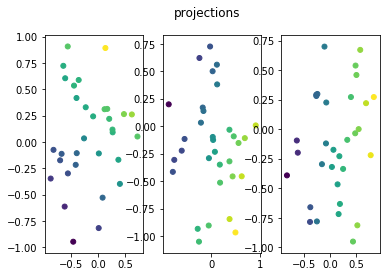

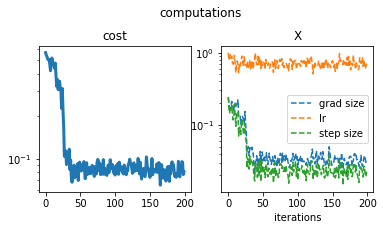

In [6]:
mv = mview.basic(dissimilarities, Q=Q, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)

print('\ninitial normalized cost:')
print(mv.initial_cost)
print('\ninitial individual normalized costs:')
print(mv.initial_individual_cost)
print('\nfinal normalized cost:')
print(mv.cost)
print('\nfinal individual normalized costs:')
print(mv.individual_cost)
print('\ncomputation time:')
print(mv.time)

mv.figureY()
mv.figureH()

Let us now go over different ways to run variations on these experiments.

## Using special sets of projections

To run the previous two experiments from before, but using the standard set of projections (as opposed to random), we just need to specify this when setting the set of dissimilarities (note, from 3D to 2D, this only works for 3 or less number of attributes/projections).

The test with varying projections is:

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 32
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 4.40e-01
gd.multiple(): 
  computation parameters:
    stochastic : True
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_cost : 1.00e-02
    min_grad : 1.00e-06
    max_iter : 200
    max_step : 1.00e+10
  progress:
200 : step = 2.34e-03, grad = 1.65e-02, cost = 1.20e-02, lr = 4.87e-01
  results:
    conclusion : minimum cost reached
    total iterations : 77
    final cost : 7.62e-03
    time : 5.77e-01 [sec]
  Final stress : 6.18e-03

initial normalized cost:
0.44044055183883163

initial individual normalized costs:
[0.42101117 0.42634426 0.47216926]

final normalized cost:
0.006178274683931341

final individual normalized costs:
[0.00737415 0.

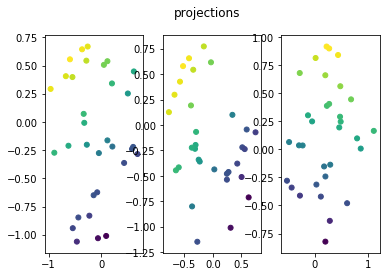

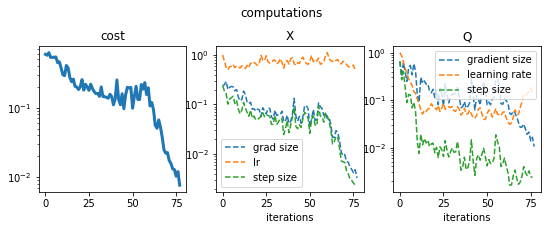

In [7]:
dissimilarities = mview.DISS(node_number=node_number)
dissimilarities.add_projections(attributes=attributes,Q='standard')
mv = mview.basic(dissimilarities, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)

print('\ninitial normalized cost:')
print(mv.initial_cost)
print('\ninitial individual normalized costs:')
print(mv.initial_individual_cost)
print('\nfinal normalized cost:')
print(mv.cost)
print('\nfinal individual normalized costs:')
print(mv.individual_cost)
print('\ncomputation time:')
print(mv.time)

mv.figureY()
mv.figureH()

The test with fix projections (specifying the correct projections used to create the data):

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : given
  dissimilarity stats:
    number of views : 3
    number of points : 32
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : fixed projections
    initial stress : 4.00e-01
gd.single(): 
  computation parameters:
    stochastic : True
    constraint : False
    update rule : mm
    min_cost : 1.00e-02
    min_grad : 1.00e-06
    max_iter : 200
    max_step : 1.00e+10
  progress:
      62/200 : cost = 1.39e-02, grad = 6.76e-03, lr = 7.71e-01, step = 5.22e-03
  results:
    conclusion : minimum cost reached
    total iterations : 63
    final cost : 9.83e-03
    final gradient size : 4.98e-03
    final learning rate : nan
    final step size : nan
    time : 4.71e-01 [sec]
  Final stress : 6.74e-03

initial normalized cost:
0.39993383644100367

initial individual normalized costs:
[0.40795055 0.39322791 0.39848385]

final normalized cost:
0.0067381312546939695

final in

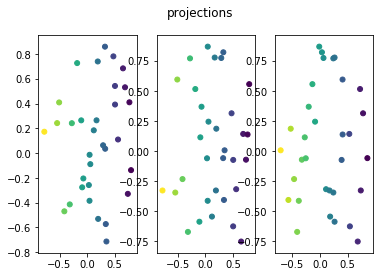

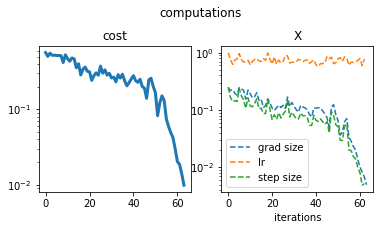

In [8]:
dissimilarities = mview.DISS(node_number=node_number)
dissimilarities.add_projections(attributes=attributes,Q='standard')
mv = mview.basic(dissimilarities, Q=dissimilarities.Q, min_cost=min_cost,
                 max_iter=max_iter, min_grad=min_grad,
                 average_neighbors=average_neighbors, lr=lr,
                 verbose=2)

print('\ninitial normalized cost:')
print(mv.initial_cost)
print('\ninitial individual normalized costs:')
print(mv.initial_individual_cost)
print('\nfinal normalized cost:')
print(mv.cost)
print('\nfinal individual normalized costs:')
print(mv.individual_cost)
print('\ncomputation time:')
print(mv.time)

mv.figureY()
mv.figureH()

## Running a different instance of the experiment each time:

To run the same experiment each time (varying projection), with new random data at each iteration:

In [9]:
print('The final normalized stress and time in each iteration are:')
for i in range(5):
    dissimilarities = mview.DISS(node_number=node_number)
    dissimilarities.add_projections(attributes=attributes)
    mv = mview.basic(dissimilarities, min_cost=min_cost,
                     max_iter=max_iter, min_grad=min_grad,
                     average_neighborsage_neighbors=average_neighbors, lr=lr)
    print(mv.cost,mv.time)

The final normalized stress and time in each iteration are:
0.009077757458255021 0.9236414432525635
0.006692983517002829 1.7341923713684082
0.006168010423606881 1.8529558181762695
0.007950804910201541 2.155967950820923
0.0094075678505426 3.4191396236419678


## Running experiments using the same set of dissimilarities each time:

To repeat the dissimilarities used, just use the same set of dissimilarities (these are not changed by MPSE).

In [10]:
dissimilarities = mview.DISS(node_number=node_number)
dissimilarities.add_projections(attributes=attributes)
print('The final normalized stress and time in each iteration are:')
for i in range(5):
    mv = mview.basic(dissimilarities, min_cost=min_cost,
                     max_iter=max_iter, min_grad=min_grad,
                     average_neighborsage_neighbors=average_neighbors, lr=lr)
    print(mv.cost,mv.time)

The final normalized stress and time in each iteration are:
0.009596024722867424 1.5299370288848877
0.009831423634832599 8.265381813049316
0.009825753220912403 4.268767833709717
0.009758550251228437 2.5315017700195312
0.009678479424550059 4.059720754623413


## Fixing your own original coordinates:

You can specify the coordinates used in creating the dissimilarity relations.

For example, to produce the same type of coordinates created by default (uniformly at random from a disk of radius 1 at the origin) you can use following (of course, you can use any array of coordinates):

In [11]:
X = mview.misc.disk(node_number,dim=3)
print('The coordinates used are:')
print(X)
print('\nThe final normalized stress and time in each iteration are:')
for i in range(5):
    dissimilarities = mview.DISS(node_number=node_number)
    dissimilarities.add_projections(attributes=attributes,X=X)
    mv = mview.basic(dissimilarities, min_cost=min_cost,
                     max_iter=max_iter, min_grad=min_grad,
                     average_neighborsage_neighbors=average_neighbors, lr=lr)
    print(mv.cost,mv.time)

The coordinates used are:
[[-0.39784634 -0.22034125 -0.32139538]
 [-0.28161414  0.16768069 -0.47988231]
 [-0.24458215  0.8586659   0.14024785]
 [-0.42141933 -0.49537781 -0.16156234]
 [ 0.6172598  -0.01961586  0.46687621]
 [-0.23813139 -0.59843414 -0.53285012]
 [-0.08305423 -0.93746017  0.24569394]
 [ 0.70579738  0.6176475   0.21305751]
 [-0.11184558  0.27888482 -0.83484846]
 [ 0.22340047  0.35651551  0.88177689]
 [ 0.1487058   0.18451314 -0.35153612]
 [ 0.03387318  0.19270759  0.1955906 ]
 [ 0.2104753  -0.04901154  0.7435204 ]
 [-0.23420033 -0.26622632 -0.0498629 ]
 [ 0.67493497 -0.40729513 -0.10829117]
 [ 0.55280664 -0.6172726  -0.21863207]
 [-0.11473311  0.63954919  0.14286707]
 [-0.31560582 -0.25782686  0.19866834]
 [-0.76526331  0.05634196 -0.41517045]
 [ 0.25674035  0.56172354  0.20157202]
 [ 0.54615402  0.05274556 -0.68530763]
 [-0.35136794  0.33755326  0.81019196]
 [ 0.37766138 -0.04158195 -0.52713532]
 [-0.53826065 -0.44736044  0.18712443]
 [ 0.55922304  0.45612936  0.65240048]